# Generation of symmetric zero-sum games

Given a randomly generated symmetric payoff matrix, can values be adjusted to yield a desired Nash equilibrium (e.g. uniform in all actions)?  Specifically, suppose each action $a$ has a fixed reward $r_a$ whenever it beats the opponent's action.  Therefore, the payoff $p(a, b) \in \{r_a, 0, -r_b\}$ depending whether $a$ defeats, ties, or is defeated by $b$.

In [44]:
import numpy as np
from numpy.random import rand
from matplotlib import pyplot as plt

In [45]:
# First, generate the sign of the payoff matrix.  No ties except for identical actions.
n = 10 # number of actions
p_sign = rand(n, n)
p_sign = p_sign - p_sign.T
p_sign = np.sign(p_sign)
p_sign

array([[ 0., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.],
       [ 1.,  0.,  1.,  1., -1., -1.,  1.,  1., -1., -1.],
       [-1., -1.,  0., -1.,  1., -1.,  1., -1.,  1., -1.],
       [-1., -1.,  1.,  0., -1., -1., -1.,  1., -1.,  1.],
       [-1.,  1., -1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
       [-1.,  1.,  1.,  1., -1.,  0., -1., -1., -1.,  1.],
       [ 1., -1., -1.,  1., -1.,  1.,  0., -1.,  1.,  1.],
       [-1., -1.,  1., -1., -1.,  1.,  1.,  0.,  1., -1.],
       [-1.,  1., -1.,  1., -1.,  1., -1., -1.,  0., -1.],
       [ 1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  0.]])

In [46]:
# desired nash equilibrium
target_p = np.ones(n)/n
# uniform rewards to begin
rewards = np.ones(n)
rewards, target_p

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))

In [47]:
# function to form payoff matrix from signs and rewards
def form_payoff(p_sign, rewards):
    payoff = np.dot(np.diag(rewards), (p_sign==1))
    payoff = payoff - payoff.T
    return payoff

In [48]:
# optimization parameters
learning_rate = 0.1
n_iterations = 1000

In [63]:
# tune rewards

def tune_rewards(p_sign, target_p, learning_rate = 0.002, n_iterations = 50000):
    # uniform rewards to begin
    rewards = np.ones(len(p_sign))
    # determine values of strategies
    # decrease the rewards of high-value strategies and increase the rewards of low-value strategies
    all_rewards = []
    all_values = []

    for iter_no in range(n_iterations):
        all_rewards.append(rewards)
        payoff = form_payoff(p_sign, rewards)
        values = np.dot(payoff, target_p)
        all_values.append(values)
        rewards = rewards - learning_rate * values

    all_rewards = np.array(all_rewards)
    all_values = np.array(all_values)
    return rewards, values, all_rewards, all_values

In [64]:
# desired nash equilibrium
target_p = np.ones(n)/n
rewards, values, all_rewards, all_values = tune_rewards(p_sign, target_p)

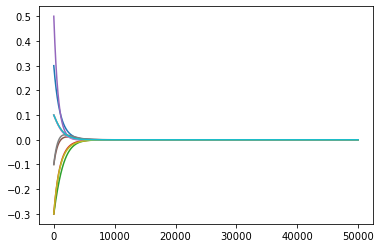

In [65]:
plt.plot(all_values)
plt.show()

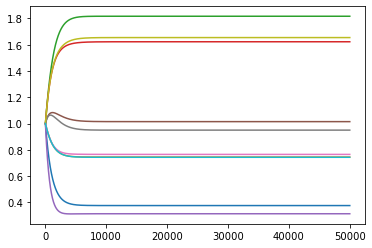

In [66]:
plt.plot(all_rewards)
plt.show()

In [67]:
rewards

array([0.37551246, 0.74504288, 1.81683797, 1.62256797, 0.31319292,
       1.01450046, 0.76498301, 0.94984128, 1.65447217, 0.74304887])

In [68]:
rewards/np.min(rewards)

array([1.19898132, 2.37886248, 5.80101868, 5.18073005, 1.        ,
       3.23921902, 2.44252971, 3.0327674 , 5.28259762, 2.37249576])

In [69]:
# discretize rewards
rewards = np.floor(rewards/np.min(rewards))
rewards

array([1., 2., 5., 5., 1., 3., 2., 3., 5., 2.])

In [70]:
# determine evo. stationary strat of discretized-reward game
payoff = form_payoff(p_sign, rewards)
payoff

array([[ 0., -2.,  1.,  1.,  1.,  1., -2.,  1.,  1., -2.],
       [ 2.,  0.,  2.,  2., -1., -3.,  2.,  2., -5., -2.],
       [-1., -2.,  0., -5.,  5., -3.,  5., -3.,  5., -2.],
       [-1., -2.,  5.,  0., -1., -3., -2.,  5., -5.,  5.],
       [-1.,  1., -5.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
       [-1.,  3.,  3.,  3., -1.,  0., -2., -3., -5.,  3.],
       [ 2., -2., -5.,  2., -1.,  2.,  0., -3.,  2.,  2.],
       [-1., -2.,  3., -5., -1.,  3.,  3.,  0.,  3., -2.],
       [-1.,  5., -5.,  5., -1.,  5., -2., -3.,  0., -2.],
       [ 2.,  2.,  2., -5., -1., -3., -2.,  2.,  2.,  0.]])

In [223]:
def evolve_strategy(payoff, probs, learning_rate = 0.0005, n_iterations = 1000000):

    all_probs = []
    all_values = []

    for iter_no in range(n_iterations):
        all_probs.append(probs)
        #probs = np.mean(all_probs, 0)
        #print(probs)
        values = np.dot(payoff, probs)
        all_values.append(values)
        probs = probs * (1 + learning_rate * values)
        probs = probs/np.sum(probs)

    all_probs = np.array(all_probs)
    all_values = np.array(all_values)
    probs = np.mean(all_probs[int(n_iterations/2):, :], 0)
    values = np.dot(payoff, probs)
    return probs, values, all_probs, all_values

In [224]:
probs = np.ones(n)/n
probs, values, all_probs, all_values = evolve_strategy(payoff, probs)

In [225]:
np.max(values)

0.0007240969241525397

In [226]:
np.array([probs, values]).T

array([[ 0.08136143, -0.00229012],
       [ 0.09665027,  0.00045826],
       [ 0.13977958,  0.00048982],
       [ 0.18554   ,  0.0007241 ],
       [ 0.00626806, -0.00766842],
       [ 0.00463782, -0.01206644],
       [ 0.11905136,  0.00024306],
       [ 0.07555837, -0.00113748],
       [ 0.1998785 ,  0.00028603],
       [ 0.0912746 ,  0.00047205]])

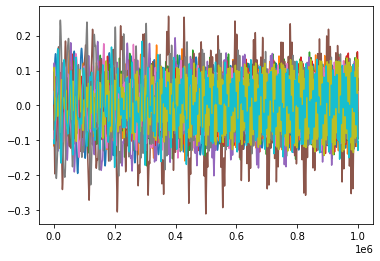

In [227]:
plt.plot(all_values)
plt.show()

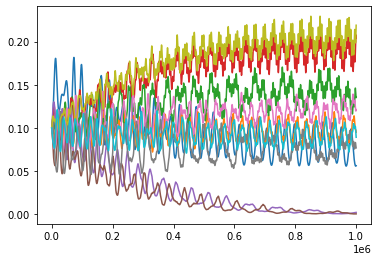

In [228]:
plt.plot(all_probs)
plt.show()